In [ ]:
from google.colab import files

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler


print("Libraries loaded successfully")

Libraries loaded successfully


In [ ]:
url = "https://huggingface.co/datasets/Cainiao-AI/LaDe/resolve/main/delivery/delivery_sh.csv"
df = pd.read_csv(url)

print("Dataset loaded successfully")
print("Shape of data:", df.shape)
df.head()

Dataset loaded successfully
Shape of data: (1483864, 17)


,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,accept_gps_lng,accept_gps_lat,delivery_time,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds
0,3158819,1,Shanghai,164,121.52128,31.06614,450,1,06-04 11:05:00,06-04 11:05:00,121.52281,31.10598,06-04 17:40:00,06-04 17:40:00,121.52407,31.06614,604
1,751342,1,Shanghai,164,121.52124,31.06687,450,1,06-04 11:18:00,06-04 11:18:00,121.52286,31.10599,06-04 15:06:00,06-04 15:06:00,121.52412,31.06618,604
2,3380476,1,Shanghai,164,121.52106,31.06731,450,1,06-03 10:13:00,06-03 10:13:00,121.52285,31.10591,06-03 15:11:00,06-03 15:11:00,121.52059,31.06672,603
3,2184571,1,Shanghai,164,121.52128,31.06616,450,1,06-04 10:39:00,06-04 10:39:00,121.52282,31.10593,06-04 15:41:00,06-04 15:41:00,121.52280,31.10542,604
4,941371,1,Shanghai,164,121.52123,31.06614,450,1,06-04 11:18:00,06-04 11:18:00,121.52285,31.10593,06-04 14:07:00,06-04 14:07:00,121.52290,31.06758,604


In [ ]:
print("Duplicates before:", df.duplicated().sum())
df = df.drop_duplicates()

print("Null values before:", df.isnull().sum().sum())
df = df.dropna()

print("Cleaned dataset shape:", df.shape)
df.head()

Duplicates before: 0
Null values before: 0
Cleaned dataset shape: (1483864, 17)


,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,accept_gps_lng,accept_gps_lat,delivery_time,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds
0,3158819,1,Shanghai,164,121.52128,31.06614,450,1,06-04 11:05:00,06-04 11:05:00,121.52281,31.10598,06-04 17:40:00,06-04 17:40:00,121.52407,31.06614,604
1,751342,1,Shanghai,164,121.52124,31.06687,450,1,06-04 11:18:00,06-04 11:18:00,121.52286,31.10599,06-04 15:06:00,06-04 15:06:00,121.52412,31.06618,604
2,3380476,1,Shanghai,164,121.52106,31.06731,450,1,06-03 10:13:00,06-03 10:13:00,121.52285,31.10591,06-03 15:11:00,06-03 15:11:00,121.52059,31.06672,603
3,2184571,1,Shanghai,164,121.52128,31.06616,450,1,06-04 10:39:00,06-04 10:39:00,121.52282,31.10593,06-04 15:41:00,06-04 15:41:00,121.52280,31.10542,604
4,941371,1,Shanghai,164,121.52123,31.06614,450,1,06-04 11:18:00,06-04 11:18:00,121.52285,31.10593,06-04 14:07:00,06-04 14:07:00,121.52290,31.06758,604


In [ ]:
df['accept_time'] = '2020-' + df['accept_time'].astype(str)
df['delivery_time'] = '2020-' + df['delivery_time'].astype(str)

df['accept_time'] = pd.to_datetime(df['accept_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['delivery_time'] = pd.to_datetime(df['delivery_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

df = df.dropna(subset=['accept_time', 'delivery_time'])

print("Datetime columns cleaned. Shape:", df.shape)
df[['accept_time', 'delivery_time']].head()

Datetime columns cleaned. Shape: (1483864, 17)


,accept_time,delivery_time
0,2020-06-04 11:05:00,2020-06-04 17:40:00
1,2020-06-04 11:18:00,2020-06-04 15:06:00
2,2020-06-03 10:13:00,2020-06-03 15:11:00
3,2020-06-04 10:39:00,2020-06-04 15:41:00
4,2020-06-04 11:18:00,2020-06-04 14:07:00


In [ ]:
df['duration_minutes'] = (df['delivery_time'] - df['accept_time']).dt.total_seconds() / 60

df = df[df['duration_minutes'] > 0]

df['hour'] = df['accept_time'].dt.hour

df['weekday'] = df['accept_time'].dt.weekday

print("Features created: duration_minutes, hour, weekday")
df[['duration_minutes', 'hour', 'weekday']].head()

Features created: duration_minutes, hour, weekday


,duration_minutes,hour,weekday
0,395.0,11,3
1,228.0,11,3
2,298.0,10,2
3,302.0,10,3
4,169.0,11,3


In [ ]:
from sklearn.preprocessing import LabelEncoder

df = df.dropna(subset=['city'])

df['city'] = df['city'].astype(str)

le = LabelEncoder()
df['city_encoded'] = le.fit_transform(df['city'])

print("City column encoded")
df[['city', 'city_encoded']].head()

City column encoded


,city,city_encoded
0,Shanghai,0
1,Shanghai,0
2,Shanghai,0
3,Shanghai,0
4,Shanghai,0


In [ ]:
df_ohe = pd.get_dummies(df['city'], prefix='city')

df = pd.concat([df, df_ohe], axis=1)

print("One-hot encoding complete. Shape now:", df.shape)
df.head()

One-hot encoding complete. Shape now: (1480716, 22)


,order_id,region_id,city,courier_id,lng,lat,aoi_id,aoi_type,accept_time,accept_gps_time,...,delivery_time,delivery_gps_time,delivery_gps_lng,delivery_gps_lat,ds,duration_minutes,hour,weekday,city_encoded,city_Shanghai
0,3158819,1,Shanghai,164,121.52128,31.06614,450,1,2020-06-04 11:05:00,06-04 11:05:00,...,2020-06-04 17:40:00,06-04 17:40:00,121.52407,31.06614,604,395.0,11,3,0,True
1,751342,1,Shanghai,164,121.52124,31.06687,450,1,2020-06-04 11:18:00,06-04 11:18:00,...,2020-06-04 15:06:00,06-04 15:06:00,121.52412,31.06618,604,228.0,11,3,0,True
2,3380476,1,Shanghai,164,121.52106,31.06731,450,1,2020-06-03 10:13:00,06-03 10:13:00,...,2020-06-03 15:11:00,06-03 15:11:00,121.52059,31.06672,603,298.0,10,2,0,True
3,2184571,1,Shanghai,164,121.52128,31.06616,450,1,2020-06-04 10:39:00,06-04 10:39:00,...,2020-06-04 15:41:00,06-04 15:41:00,121.52280,31.10542,604,302.0,10,3,0,True
4,941371,1,Shanghai,164,121.52123,31.06614,450,1,2020-06-04 11:18:00,06-04 11:18:00,...,2020-06-04 14:07:00,06-04 14:07:00,121.52290,31.06758,604,169.0,11,3,0,True


In [ ]:
from sklearn.preprocessing import StandardScaler

features_to_scale = ['duration_minutes', 'hour', 'weekday']

scaler = StandardScaler()
scaled_values = scaler.fit_transform(df[features_to_scale])

scaled_df = pd.DataFrame(scaled_values, columns=[f + '_scaled' for f in features_to_scale])

df = df.reset_index(drop=True)
df = pd.concat([df, scaled_df], axis=1)

print("Feature scaling complete")
df[[col for col in df.columns if 'scaled' in col]].head()

Feature scaling complete


,duration_minutes_scaled,hour_scaled,weekday_scaled
0,1.293288,-0.408452,0.008047
1,0.531788,-0.408452,0.008047
2,0.850979,-0.700752,-0.495168
3,0.869219,-0.700752,0.008047
4,0.262755,-0.408452,0.008047


In [ ]:
print("Deliveries per city:")
print(df['city'].value_counts().head())

print("\n Deliveries per hour:")
print(df['hour'].value_counts().sort_index())

print("\n Deliveries per weekday:")
print(df['weekday'].value_counts().sort_index())

Deliveries per city:
city
Shanghai    1480716
Name: count, dtype: int64

 Deliveries per hour:
hour
0          1
5          6
6        506
7      16479
8     178242
9     213432
10    161589
11    137458
12    101129
13     88721
14    106204
15    127215
16    145002
17     88637
18     63908
19     30179
20     13966
21      5516
22      2044
23       482
Name: count, dtype: int64

 Deliveries per weekday:
weekday
0    209954
1    212168
2    218184
3    209580
4    216411
5    210963
6    203456
Name: count, dtype: int64


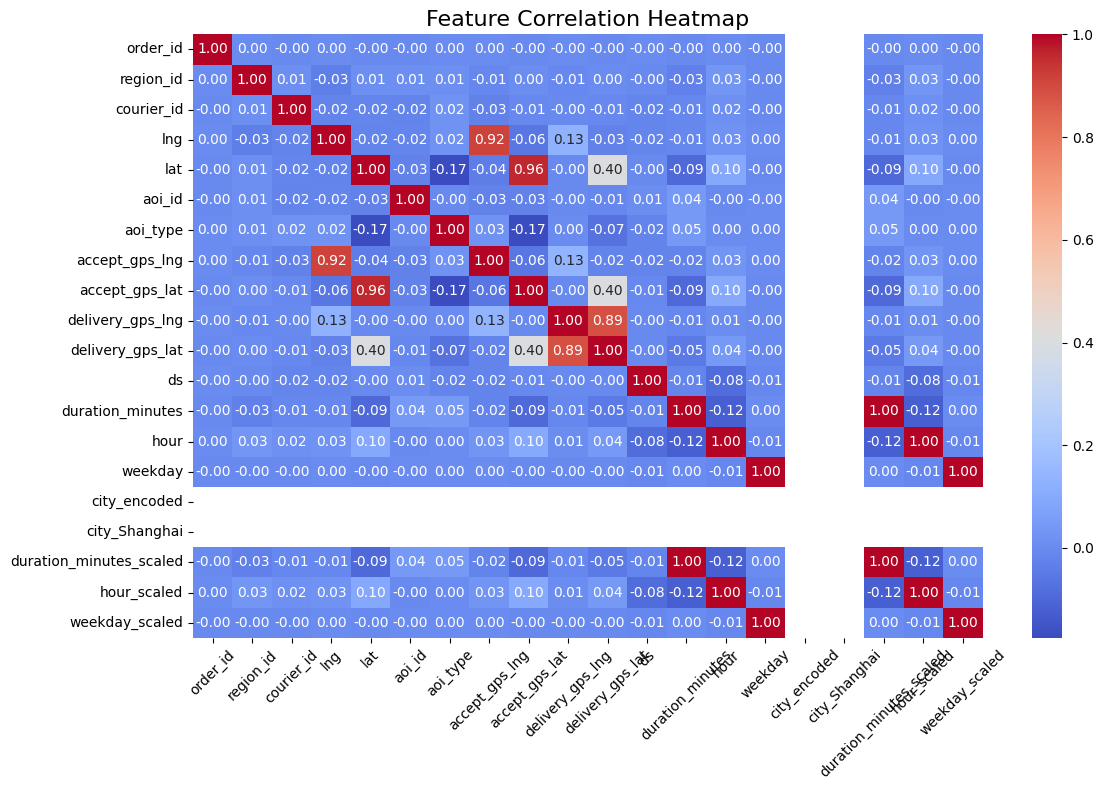

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

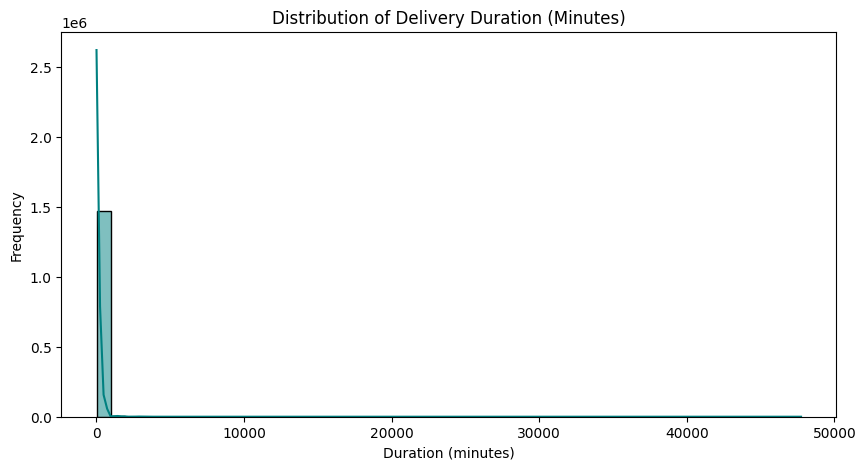

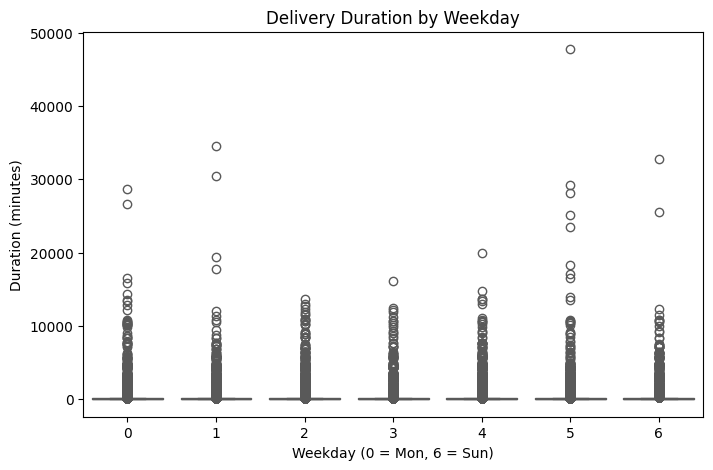

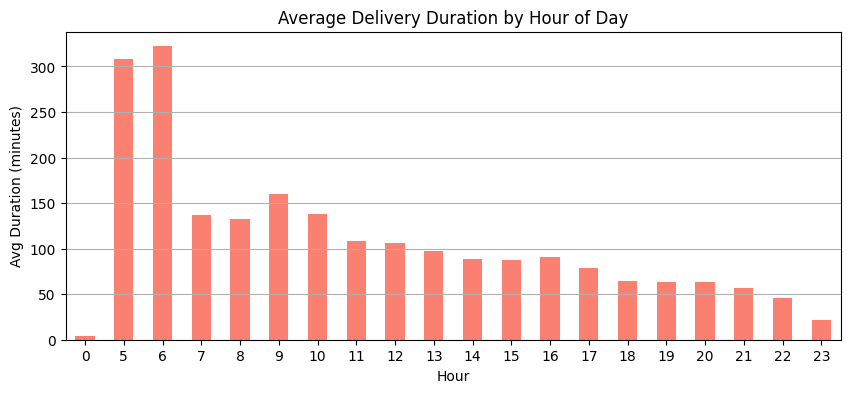

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['duration_minutes'], bins=50, kde=True, color='teal')
plt.title("Distribution of Delivery Duration (Minutes)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='weekday', y='duration_minutes', data=df, palette='Set2')
plt.title("Delivery Duration by Weekday")
plt.xlabel("Weekday (0 = Mon, 6 = Sun)")
plt.ylabel("Duration (minutes)")
plt.show()

avg_by_hour = df.groupby('hour')['duration_minutes'].mean()
plt.figure(figsize=(10, 4))
avg_by_hour.plot(kind='bar', color='salmon')
plt.title("Average Delivery Duration by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Avg Duration (minutes)")
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.show()

In [ ]:
df.to_csv('delivery_cleaned.csv', index=False)
files.download("delivery_cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print(df.columns)

Index(['order_id', 'region_id', 'city', 'courier_id', 'lng', 'lat', 'aoi_id',
       'aoi_type', 'accept_time', 'accept_gps_time', 'accept_gps_lng',
       'accept_gps_lat', 'delivery_time', 'delivery_gps_time',
       'delivery_gps_lng', 'delivery_gps_lat', 'ds', 'duration_minutes',
       'hour', 'weekday', 'city_encoded', 'city_Shanghai',
       'duration_minutes_scaled', 'hour_scaled', 'weekday_scaled'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X = df.drop(columns=['duration_minutes', 'order_id', 'accept_time', 'delivery_time'])


y = df['duration_minutes']

In [ ]:
X = X.select_dtypes(include=[np.number])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(objective="reg:squarederror", random_state=42)
}

In [ ]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\n {name} Evaluation:")
    print(f"MAE (Mean Absolute Error): {mae:.2f}")
    print(f"MSE (Mean Squared Error): {mse:.2f}")
    print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
    print(f"R² Score: {r2:.4f}")


 Linear Regression Evaluation:
MAE (Mean Absolute Error): 0.00
MSE (Mean Squared Error): 0.00
RMSE (Root Mean Squared Error): 0.00
R² Score: 1.0000

 Random Forest Evaluation:
MAE (Mean Absolute Error): 0.09
MSE (Mean Squared Error): 1292.92
RMSE (Root Mean Squared Error): 35.96
R² Score: 0.9743

 XGBoost Evaluation:
MAE (Mean Absolute Error): 5.05
MSE (Mean Squared Error): 16385.39
RMSE (Root Mean Squared Error): 128.01
R² Score: 0.6739


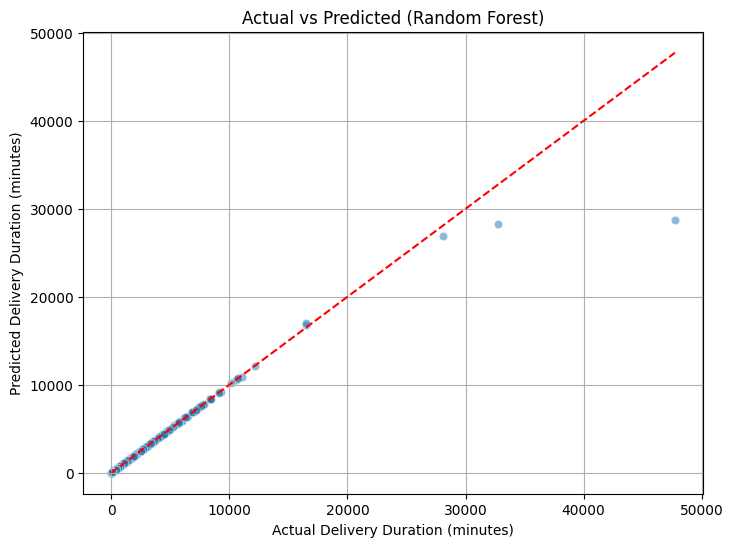

In [ ]:
best_model = models['Random Forest']
y_pred_rf = best_model.predict(X_test_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Delivery Duration (minutes)')
plt.ylabel('Predicted Delivery Duration (minutes)')
plt.title('Actual vs Predicted (Random Forest)')
plt.grid(True)
plt.show()

In [ ]:
import joblib

joblib.dump(models['Random Forest'], 'random_forest_model.pkl')


['random_forest_model.pkl']

In [ ]:
sample_data = X_test_scaled[0].reshape(1, -1)
prediction = models['Random Forest'].predict(sample_data)

print(f"Predicted delivery duration (minutes): {prediction[0]:.2f}")

Predicted delivery duration (minutes): 96.00


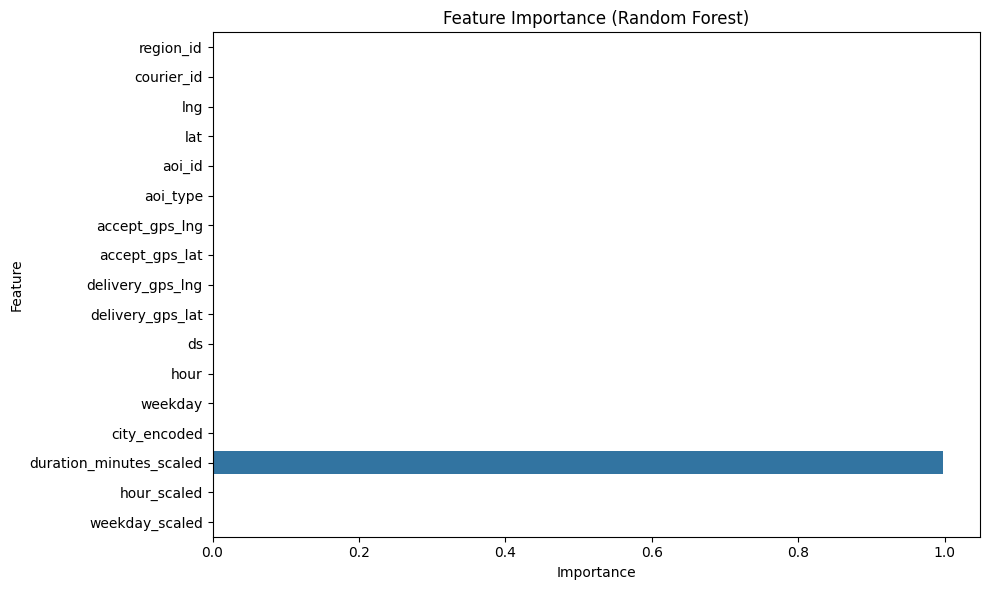

In [ ]:
importances = models['Random Forest'].feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
results_df = pd.DataFrame({
    'Actual Duration': y_test.values,
    'Predicted Duration': y_pred_rf
})

results_df.to_csv('delivery_predictions.csv', index=False)
print("Predictions saved as delivery_predictions.csv")

Predictions saved as delivery_predictions.csv


In [ ]:
import joblib
joblib.dump(models['Random Forest'], 'random_forest_model.pkl')
print("Model saved as random_forest_model.pkl")

Model saved as random_forest_model.pkl


In [ ]:
model_results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    model_results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2 Score': r2
    })

results_df = pd.DataFrame(model_results)
results_df = results_df.sort_values(by='RMSE')
print("Model Comparison Table:")
display(results_df)

Model Comparison Table:


,Model,MAE,MSE,RMSE,R2 Score
0,Linear Regression,1.621391e-13,6.650471e-26,2.578851e-13,1.000000
1,Random Forest,9.126918e-02,1.292916e+03,3.595715e+01,0.974271
2,XGBoost,5.053588e+00,1.638539e+04,1.280054e+02,0.673928


In [ ]:
summary = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    summary.append({
        'Model': name,
        'MAE': mean_absolute_error(y_test, preds),
        'RMSE': np.sqrt(mean_squared_error(y_test, preds)),
        'R2': r2_score(y_test, preds)
    })

pd.DataFrame(summary).sort_values('RMSE')

,Model,MAE,RMSE,R2
0,Linear Regression,1.621391e-13,2.578851e-13,1.000000
1,Random Forest,9.126918e-02,3.595715e+01,0.974271
2,XGBoost,5.053588e+00,1.280054e+02,0.673928


In [ ]:
from google.colab import files
files.download("delivery_cleaned.csv")
files.download('random_forest_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>